<a href="https://colab.research.google.com/github/RoshanKumar854/DSE-Projects/blob/main/Trix_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
print(df)

                   PLAYER  Mat  Inns  ...  Unnamed: 15  Unnamed: 16  Unnamed: 17
0            Chris  Gayle   12    12  ...        Gayle          NaN          NaN
1            Virat  Kohli   16    16  ...        Kohli          NaN          NaN
2       Sachin  Tendulkar   16    16  ...    Tendulkar          NaN          NaN
3            Shaun  Marsh   14    13  ...        Marsh          NaN          NaN
4         Michael  Hussey   14    14  ...       Hussey          NaN          NaN
..                    ...  ...   ...  ...          ...          ...          ...
145        Ishant  Sharma   12     5  ...       Sharma          NaN          NaN
146  Lakshmipathy  Balaji   14     2  ...       Balaji          NaN          NaN
147   Shalabh  Srivastava    6     2  ...   Srivastava          NaN          NaN
148     Sridharan  Sriram    1     1  ...       Sriram          NaN          NaN
149           Ryan  Ninan    2     1  ...        Ninan          NaN          NaN

[150 rows x 18 columns]


In [4]:
x = df[['Runs','Avg','SR','4s','6s']]
y = df['Auction Price']

Text(0, 0.5, 'Auction Price')

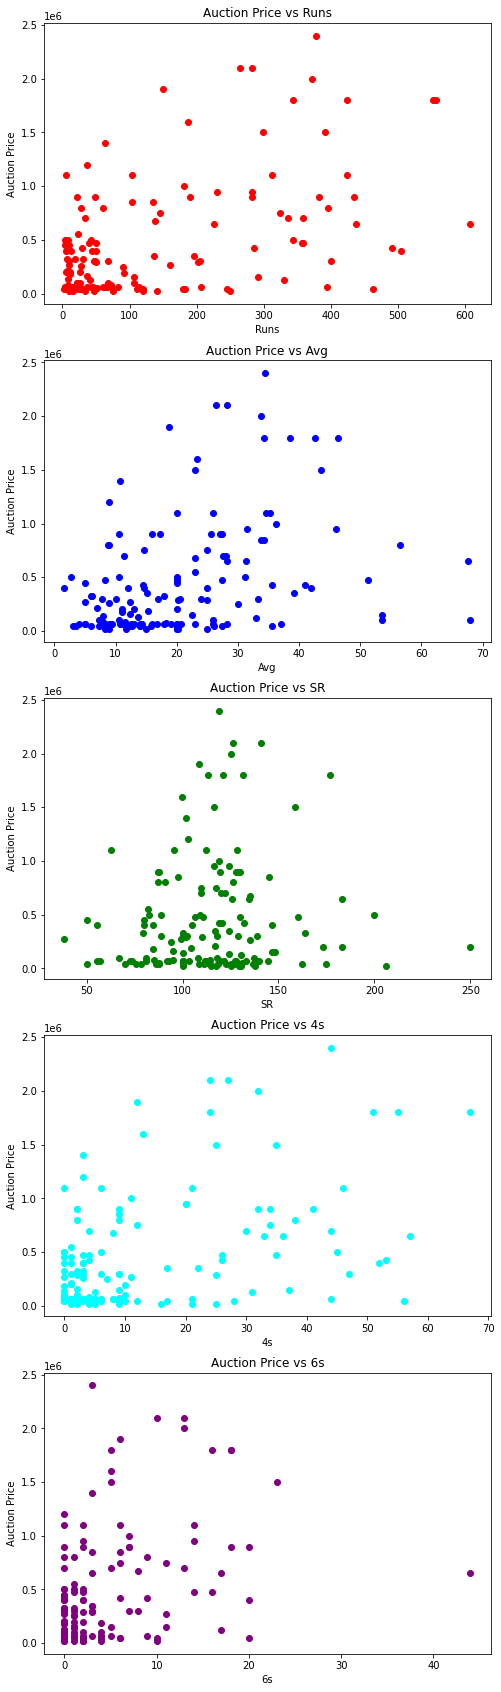

In [19]:
fig, axs = plt.subplots(5, 1,figsize=(8,30))
axs[0].scatter(x['Runs'],y,color='red')
axs[0].set_title('Auction Price vs Runs')
axs[0].set_xlabel('Runs')
axs[0].set_ylabel('Auction Price')

axs[1].scatter(x['Avg'],y,color='blue')
axs[1].set_title('Auction Price vs Avg')
axs[1].set_xlabel('Avg')
axs[1].set_ylabel('Auction Price')

axs[2].scatter(x['SR'],y,color='green')
axs[2].set_title('Auction Price vs SR')
axs[2].set_xlabel('SR')
axs[2].set_ylabel('Auction Price')

axs[3].scatter(x['4s'],y,color='cyan')
axs[3].set_title('Auction Price vs 4s')
axs[3].set_xlabel('4s')
axs[3].set_ylabel('Auction Price')

axs[4].scatter(x['6s'],y,color='purple')
axs[4].set_title('Auction Price vs 6s')
axs[4].set_xlabel('6s')
axs[4].set_ylabel('Auction Price')

In [5]:
print(x)

     Runs    Avg      SR  4s  6s
0     608  67.55  183.13  57  44
1     557  46.41  121.08  55  16
2     553  42.53  113.31  67   5
3     504  42.00  146.51  52  20
4     492  41.00  118.84  53   6
..    ...    ...     ...  ..  ..
145     4  20.00   80.00   0   0
146     4  20.00  200.00   0   0
147     4  20.00  133.33   0   0
148     4   4.00   57.14   0   0
149     3   3.00   50.00   0   0

[150 rows x 5 columns]


In [6]:
print(y)

0       650000
1      1800000
2      1800000
3       400000
4       425000
        ...   
145     450000
146     500000
147      65000
148      65000
149      45000
Name: Auction Price, Length: 150, dtype: int64


In [12]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Auction Price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     14.35
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.14e-11
Time:                        13:42:15   Log-Likelihood:                -2159.1
No. Observations:                 150   AIC:                             4330.
Df Residuals:                     144   BIC:                             4348.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.122e+05   1.48e+05      1.433      0.154   -8.05e+04    5.05e+05
Runs        6754.8721   1505.877      4.486      0.000    3778.394    9731.351
Avg        -3445.2064   4262.920     -0.808      0.420   -1.19e+04    4980.775
SR           -23.4782   1342.264     -0.017      0.986   -2676.564    2629.607
4s         -3.616e+04   1.11e+04     -3.261      0.001   -5.81e+04   -1.42e+04
6s         -2.919e+04   1.28e+04     -2.285      0.024   -5.44e+04   -3941.839
==============================================================================
Omnibus:                       36.396   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.788
Skew:                           1.198   Prob(JB):                     1.04e-13
Kurtosis:                       4.956   Cond. No.                         913.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

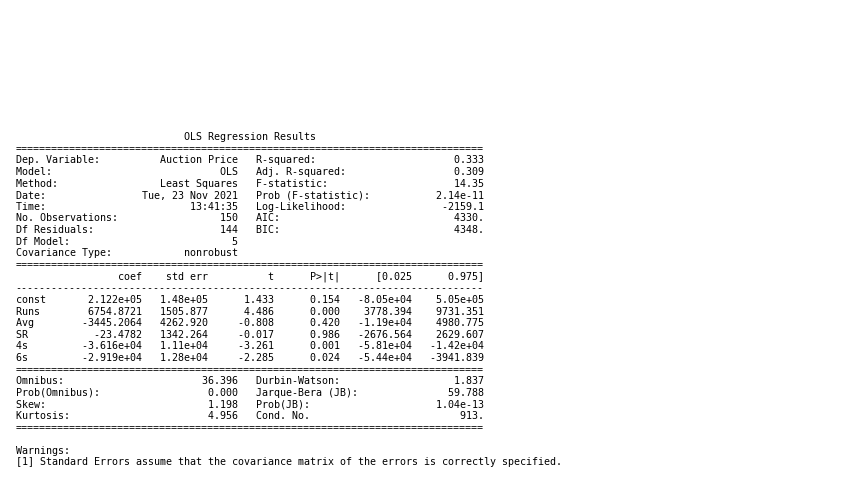

In [8]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [9]:
import scipy.stats as stats
import math

In [ ]:
astype(float)